<a href="https://colab.research.google.com/github/kushshah777/MachineLearningAssignment2/blob/master/Architecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This architecture has 1 conv2d layer, 2relu activation,maxpooling2d and dropout rate of 0.5

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt



Using TensorFlow backend.


Initializing parameters


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_folds = np.array_split(x_train, 5)
print(X_folds[4].shape)
y_folds = np.array_split(y_train, 5)
scores = list()

X_train = list(X_folds)
X_val = X_train.pop(4)
X_train = np.concatenate(X_train)
y_train = list(y_folds)
y_val = y_train.pop(4)
y_train = np.concatenate(y_train)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(10000, 32, 32, 3)
40000
40000
10000
10000


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(X_train)
for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            break


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 16s 398us/step - loss: 1.9871 - acc: 0.2736
Epoch 1/1
40000/40000 [==============================] - 15s 368us/step - loss: 1.6874 - acc: 0.3931
Epoch 1/1
40000/40000 [==============================] - 15s 382us/step - loss: 1.5786 - acc: 0.4311
Epoch 1/1
40000/40000 [==============================] - 15s 363us/step - loss: 1.5149 - acc: 0.4551
Epoch 1/1
40000/40000 [==============================] - 15s 383us/step - loss: 1.4647 - acc: 0.4732
Epoch 1/1
40000/40000 [==============================] - 14s 354us/step - loss: 1.4335 - acc: 0.4872
Epoch 1/1
40000/40000 [==============================] - 14s 352us/step - loss: 1.3985 - acc: 0.4971
Epoch 1/1
40000/40000 [==============================] - 1

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 389us/step - loss: 1.2073 - acc: 0.5719 - val_loss: 1.2229 - val_acc: 0.5936
Epoch 2/100
40000/40000 [==============================] - 15s 382us/step - loss: 1.1810 - acc: 0.5822 - val_loss: 1.1996 - val_acc: 0.6008
Epoch 3/100
40000/40000 [==============================] - 15s 382us/step - loss: 1.1520 - acc: 0.5920 - val_loss: 1.1807 - val_acc: 0.6109
Epoch 4/100
40000/40000 [==============================] - 15s 385us/step - loss: 1.1379 - acc: 0.5973 - val_loss: 1.1784 - val_acc: 0.5983
Epoch 5/100
40000/40000 [==============================] - 15s 380us/step - loss: 1.1251 - acc: 0.6060 - val_loss: 1.1636 - val_acc: 0.6243
Epoch 6/100
40000/40000 [==============================] - 15s 380us/step - loss: 1.1059 - acc: 0.6084 - val_loss: 1.1291 - val_acc: 0.6448
Epoch 7/100
40000/40000 [==============================] - 15s 381us/step - loss: 1.0884 - acc: 0.6163 - val_l

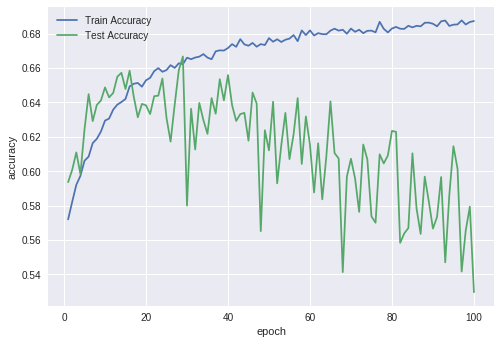

validation loss: 1.6251395429611206
validation accuracy: 0.5296


In [0]:
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])
